In [4]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout

vocab_size = 10000
maxlen = 200  

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print("Training shape:", X_train.shape, "Testing shape:", X_test.shape)



Training shape: (25000, 200) Testing shape: (25000, 200)


In [ ]:

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=3,
                    validation_data=(X_test, y_test),
                    verbose=1)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 192ms/step - accuracy: 0.8044 - loss: 0.4383 - val_accuracy: 0.8320 - val_loss: 0.3842
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 75s 193ms/step - accuracy: 0.8664 - loss: 0.3247 - val_accuracy: 0.8569 - val_loss: 0.3449
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 201ms/step - accuracy: 0.8944 - loss: 0.2675 - val_accuracy: 0.8418 - val_loss: 0.3707


In [ ]:

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")


✅ Test Accuracy: 84.18%


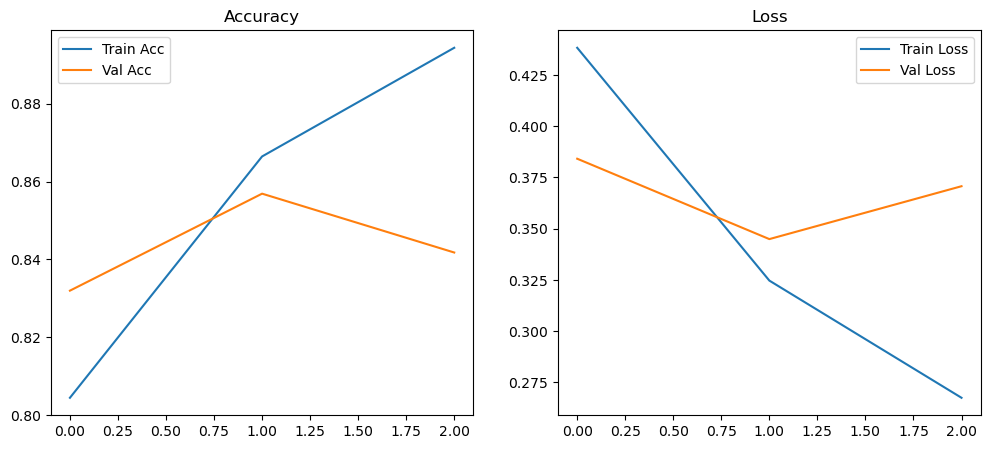

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")

plt.show()

In [10]:
# Step 8: Predict on custom review
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Example: predict first review
sample = X_test[0].reshape(1, maxlen)
pred = model.predict(sample)[0][0]
print("Review:", decode_review(X_test[0]))
print("Predicted Sentiment:", "Positive 😀" if pred > 0.5 else "Negative 😞")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Review: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Predicted Sentiment: Negative 😞
